In [1]:
import csv
import cv2
import numpy as np

##read csv file
lines =[]
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
##get image current path / data from csv
images = []
measurements = []
resizeX = 32
resizeY = 16

for i in range(1, len(lines)):
    for j in range(3):
        source_path = lines[i][0]
        filename = source_path.split('/')[-1]
        current_path = './data/IMG/' + filename

        image = cv2.imread(current_path)
        resized = cv2.resize((cv2.cvtColor(image, cv2.COLOR_RGB2HSV))[:,:,1],(resizeX,resizeY))
        images.append(resized)
        
        measurement = float(lines[i][3])
        measurements.append(measurement)

In [2]:
#data argmentation
from sklearn.utils import shuffle
augmented_images, augmented_measurements = [],[]
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

X_train, y_train = shuffle(X_train, y_train)
X_train = X_train.reshape(X_train.shape[0], resizeY, resizeX, 1)

print(X_train.shape)

(14916, 16, 32, 1)


(16, 32)
-0.121892


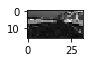

In [3]:
##test load result
import matplotlib.pyplot as plt
import random
%matplotlib inline

##display just one image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [4]:
##build classification network
from keras.models import *
from keras.layers import Flatten, Dense, Lambda,Cropping2D
from keras.layers import *
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam

model = Sequential()#build model
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(16,32,1)))#preprocess
#model.add(Cropping2D(cropping=((70,25),(0,0))))

#Lenet
#model.add(Conv2D(2,3,3,subsample=(2,2),activation="relu"))
model.add(Conv2D(2, 3, 3, border_mode='valid', input_shape=(resizeX,resizeY,1), activation='relu'))
model.add(MaxPooling2D((4,4),(4,4),'valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))

#model.summary()
model.compile(loss='mse', optimizer='adam')

Using TensorFlow backend.


In [5]:
from keras.models import Model
batchSize = 128
epoch = 5

model.fit(X_train, y_train, batch_size=batchSize, nb_epoch=epoch, verbose=1,validation_data=(X_val, y_val))

Epoch 1/5
48216/48216 [==============================] - 4s - loss: 0.0226       

In [6]:
#save model
# serialize model to JSON

from keras.models import load_model

model.save('model.h5')  # creates a HDF5 file 'my_model.h5'
print("Save Model to Disc")

#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)

#model.save_weights("model.h5")
#print("Model saved.")
#del model  # deletes the existing model

Model saved.
